<a href="https://www.kaggle.com/code/dipit099/flowers-recognition-pytorch?scriptVersionId=193001220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [41]:
import os                                         # To work with OS commands
from PIL import Image                             # To read Images
from termcolor import colored                     # To Colorfull output
from datetime import datetime                     # To calculate durations

import numpy as np                                # To work with Numpy arrays
import matplotlib.pyplot as plt                   # To Visualization
import seaborn as sns                             # To Visualization

import torch                                      # To work with TORCH framework
import torch.nn as nn                             # To work with Neural Networks
import torchvision                                # To work with image datasets
import torchvision.transforms as transforms       # To create data transforms
from torchvision.models import efficientnet_b5, EfficientNet_B5_Weights # Pretrained model with its weights

from sklearn.metrics import confusion_matrix, classification_report # To Evaluate the result

In [42]:
# from google.colab import drive
# drive.mount('/content/drive')

In [43]:
base_dir = '/kaggle/input/flowers-recognition/flowers'
classes = os.listdir(base_dir)  #lists all the files and directories within the base_dir.
print(f'Number of classes : {len(classes)}')
print(f'Classes : {classes}')


Number of classes : 5
Classes : ['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


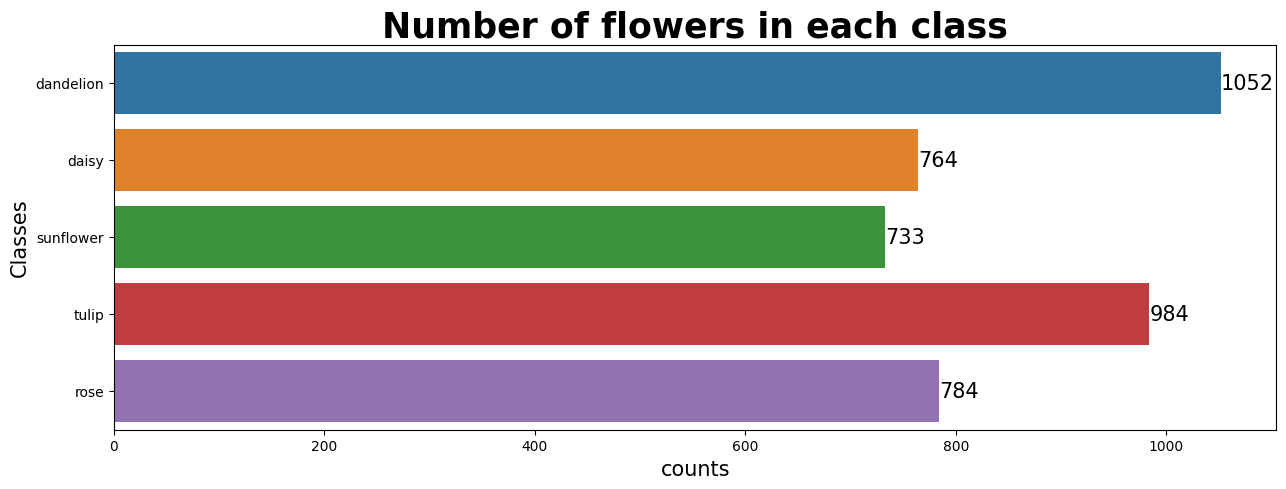

In [44]:
counts = []

# Loop over classes and add count of each class to above list
for class_name in classes :
    counts.append(len(os.listdir(os.path.join(base_dir, class_name))))

# Plot the result
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=counts, y=classes)
ax.bar_label(ax.containers[0], fontsize=15)
plt.title('Number of flowers in each class', fontsize=25, fontweight='bold')
plt.xlabel('counts', fontsize=15)
plt.ylabel('Classes', fontsize=15)
plt.show()


### Do the below line only ONCE ! Uncomment this

In [45]:
# ! pip install -q split-folders

# import splitfolders      
# # To split data to train, test and validation folders
# splitfolders.ratio(
#     input=base_dir, output='Images', seed=101, ratio=(0.7, 0.15, 0.15)
# )

In [46]:
# new created folder directory
Images_path = '/kaggle/working/Images'

In [47]:
# define transformation
transform = transforms.Compose(
    [
        transforms.Resize((250,250)),      # Resize images to a target size
        transforms.ToTensor(),             # Convert images to tensor
        transforms.Normalize((0),(1))      # transforms.Normalize((0), (1)) doesn’t change the image data.
    ]
)

In [48]:
import torch.utils.data
BATCH_SIZE = 32   #determines how many samples are processed together in each forward/backward pass during training.

# Read images in train folder
train_ds = torchvision.datasets.ImageFolder(
                                            os.path.join(Images_path, 'train'),  # adds /train with that path
                                            transform=transform  #resizing and normalization
)

# Create a DataLoader for train images
train_loader = torch.utils.data.DataLoader(
                                            train_ds,
                                            batch_size=BATCH_SIZE,
                                            shuffle=True   #32 images will be loaded together in each batch.
)

print(colored(f'TRAIN Folder :\n ', 'green', attrs=['bold']))
print(train_ds)  # printing how many files are there ..


TRAIN Folder :
 
Dataset ImageFolder
    Number of datapoints: 3019
    Root location: /kaggle/working/Images/train
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=0, std=1)
           )


In [49]:
image, label = train_ds[900]
# image is the tensor form and label is the index no of the species
print(image.shape)
print(label)
image

torch.Size([3, 250, 250])
1


tensor([[[1.0000, 0.9843, 0.9882,  ..., 0.9922, 0.9922, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [0.9882, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9882],
         ...,
         [0.9882, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 0.9922, 1.0000],
         [1.0000, 0.9961, 0.9922,  ..., 0.9922, 0.9804, 1.0000]],

        [[1.0000, 0.9843, 0.9882,  ..., 0.9922, 0.9922, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [0.9882, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9882],
         ...,
         [0.9882, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 0.9922, 1.0000],
         [1.0000, 0.9961, 0.9922,  ..., 0.9922, 0.9804, 1.0000]],

        [[1.0000, 0.9843, 0.9882,  ..., 0.9922, 0.9922, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [0.9882, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.

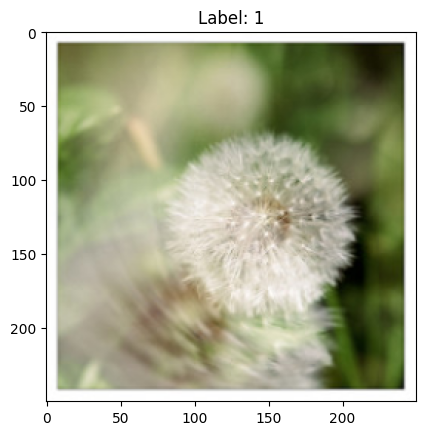

In [50]:
# To visualize the image, convert the tensor to a numpy array and plot it
image_np = image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C) for visualization

plt.imshow(image_np)
plt.title(f"Label: {label}")
plt.show()

In [51]:
# Read images in val folder
val_ds = torchvision.datasets.ImageFolder(
    os.path.join(Images_path, 'val'),
    transform=transform
)

# Create a DataLoader for validation images
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=BATCH_SIZE, shuffle=True
)
print(colored(f'VALIDATION Folder :\n ', 'green', attrs=['bold']))
print(val_ds)

VALIDATION Folder :
 
Dataset ImageFolder
    Number of datapoints: 644
    Root location: /kaggle/working/Images/val
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=0, std=1)
           )


In [52]:
test_ds = torchvision.datasets.ImageFolder(
    os.path.join(Images_path, 'test'), transform=transform
)

# Create a DataLoader for test images
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=BATCH_SIZE, shuffle=True
)
print(colored(f'TEST Folder :\n ', 'green', attrs=['bold']))
print(test_ds)

TEST Folder :
 
Dataset ImageFolder
    Number of datapoints: 654
    Root location: /kaggle/working/Images/test
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=0, std=1)
           )


In [53]:
# Create a label map to translate labels
label_map = {
    0 : 'Daisy',
    1 : 'Dandelion',
    2 : 'Rose',
    3 : 'SunFlower',
    4 : 'Tulips'
}

In [54]:
# lets 1st Fetch 1 Batch from train_loader(contain 32 Images and Labels)
for images, labels in train_loader :
    break

Copying files: 0 files [24:24, ? files/s]


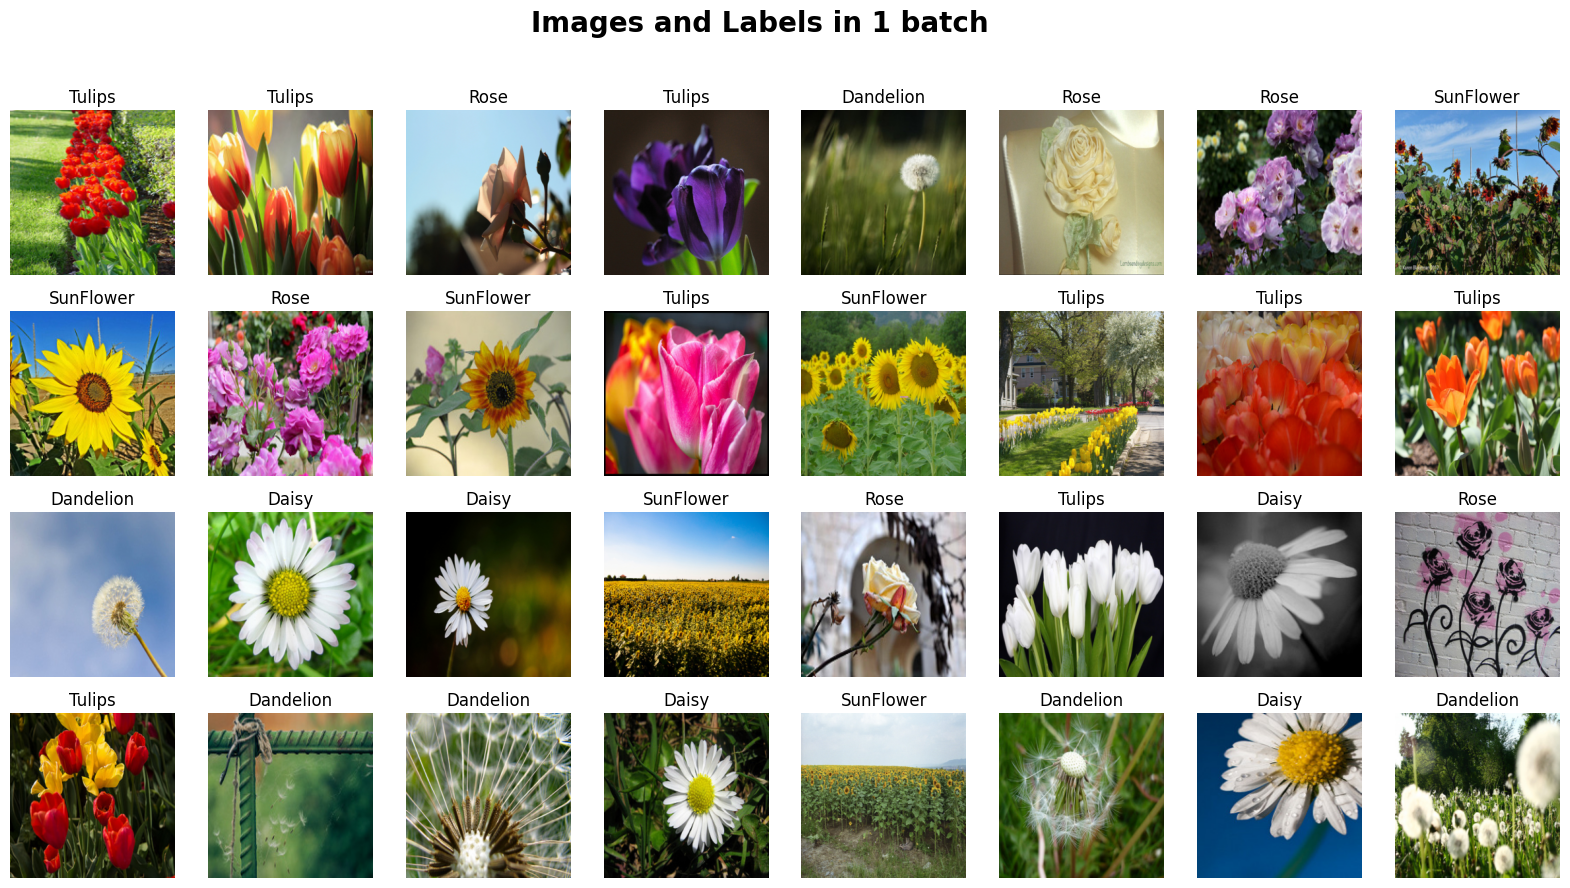

In [55]:
# Plot images and their labels in 1 batch (32 images and labels)
plt.subplots(4, 8, figsize=(20, 10))
plt.suptitle('Images and Labels in 1 batch', fontsize=20, fontweight='bold')

for i in range(BATCH_SIZE) :
    ax = plt.subplot(4, 8, i+1)
    img = torch.permute(images[i], (1, 2, 0))
    #Many visualization libraries, such as matplotlib expect images to be in the format [Height, Width, Channels]
    #But PyTorch’s default image tensor format is [Channels, Height, Width] (i.e., [C, H, W]),
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_map[int(labels[i])])

plt.show()

In [56]:
# confirming whether the images in train, test and valid are of same dimension
for key, value in {'Train': train_loader, "Validation": val_loader, 'Test': test_loader}.items():
    for X, y in value:
        print(colored(f' {key}:', 'green', attrs=['bold']))
        print(f"Shape of images [Batch_size, Channels, Height, Width]: {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

 Train:
Shape of images [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Shape of y: torch.Size([32]) torch.int64

 Validation:
Shape of images [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Shape of y: torch.Size([32]) torch.int64

 Test:
Shape of images [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Shape of y: torch.Size([32]) torch.int64



### Lets Load a Pretrained Model

After a little search on pretrained model, finally I decided to choose efficientnet_b5 based on parameters, speed and accuracy.

In [57]:
# Load efficientnet_b5 weight (best weight)
weights = EfficientNet_B5_Weights.DEFAULT   # I have imported this..Check the beginning of this file

# This function prepare images to feed into efficientnet_b5 model
preprocess = weights.transforms()

# Load efficientnet_b5 model with best weights
efficientnet_model = efficientnet_b5(weights=weights)

In [ ]:
for name, param in efficientnet_model.named_parameters():
    print(name)

In [59]:
# # List of all layers of efficientnet_b5

# for child in efficientnet_model.children() :
#     print(child)

In [ ]:
for name, param in efficientnet_model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")

In [61]:
# Freezing parameters means that during training, these parameters will not be updated (i.e., their gradients will not be computed).
# This is typically done when you want to use a pretrained model as a feature extractor and do not want to modify the pretrained weights.
for param in efficientnet_model.parameters() :
    param.requires_grad = False

# Then Unfreeze some of last layers of model
# By unfreezing the last layers, you allow their weights to be updated during training.
# ONLY unfreeze LAST LAYER when using a pretrained model !!!!
for param in efficientnet_model.features[6].parameters() :   # refers to the seventh block
    param.requires_grad = True

In [ ]:
for name, param in efficientnet_model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")


### Lets Create a VGG16 Model too ...just for checking . Comment out this if u use the efficientnet_b5 model

In [63]:
# from torchvision.models import vgg16, VGG16_Weights

# # Load the pre-trained VGG16 weights
# weights = VGG16_Weights.DEFAULT

# # This function prepares images to feed into VGG16
# preprocess = weights.transforms()

# # Load VGG16 model with pre-trained weights
# vgg16_model = vgg16(weights=weights)

# for name, param in vgg16_model.named_parameters():
#     print(name)
# for name, param in vgg16_model.named_parameters():
#     print(f"{name}: requires_grad = {param.requires_grad}")


# # Freeze all layers except the final fully connected layer
# for name, param in vgg16_model.named_parameters():
#     if "classifier.6" in name:  # Unfreeze the final fully connected layer
#         param.requires_grad = True
#     else:
#         param.requires_grad = False

# for name, param in vgg16_model.named_parameters():
#     print(f"{name}: requires_grad = {param.requires_grad}")


In [79]:
# Number of classes
num_classes = len(classes)

class CNN(nn.Module) :
    def __init__(self, num_classes) :
        super(CNN, self).__init__()
        ####  CONVs
        self.conv_layers = efficientnet_model   # UPDATE YOUR MODEL !!!!!!!!!!!!!!!!!!!!!!!
        ####  Dense
        self.dense_layers = nn.Sequential(
            nn.Linear(1000, 256),  # UPDATE !efficientnet_model has 1000 classes in its layer thats why we take from there
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 5)    # The number 5 corresponds to the number of output classes
        )
    def forward(self, X) :
        out = self.conv_layers(X)
         # the output tensor is typically multi-dimensional (e.g., [batch_size, channels, height, width]). out.size(0): This is the batch size
        out = out.view(out.size(0), -1)    # used to flatten the output tensor
        out = self.dense_layers(out)
        return out


model = CNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())  # default => torch.optim.Adam (Adaptive Moment Estimation): lr=0.001

#print(model)


**When using multiple GPUs, always check that all tensors and modules are on the same device. This includes the model, inputs, and labels.abs**

In [ ]:


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

model.to(device)


In [81]:
torch.manual_seed(32)

num_epochs = 5

# below, train_losses is initialized as a NumPy array with zeros.
#Predefined Size: This method creates a fixed-size array with a size of num_epochs,
#which is useful if you want to use array indexing for storing loss values.

train_losses = np.zeros(num_epochs)  # 0 0 0 0 0 ..stored in this format
val_losses = np.zeros(num_epochs)
train_accs = np.zeros(num_epochs)
val_accs = np.zeros(num_epochs)

for it in range(num_epochs) :

    # Define some variabels to store metrics in each epoch
    train_loss = []
    val_loss = []
    n_correct = 0
    n_total = 0
    # Change mode to TRAIN
    model.train()
    t0 = datetime.now()

    # Fetch images from DataLoader
    for images, labels in train_loader :
        # Move data to GPU
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero Grad optimizer
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(images)
        loss = criterion(y_pred, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Train loss
        train_loss.append(loss.item())

        # Train Accuracy Calculate
        _, prediction = torch.max(y_pred, 1)
        n_correct += (prediction==labels).sum().item()
        n_total += labels.shape[0]

    train_loss = np.mean(train_loss)
    train_losses[it] = train_loss
    train_accs[it] = n_correct / n_total

    # Validation
    for images, labels in val_loader :
         # Move data to GPU
        images = images.to(device)
        labels = labels.to(device)
        # Forward padd
        y_pred = model(images)
        loss = criterion(y_pred, labels)

        # Validation Loss
        val_loss.append(loss.item())

        # Validation Accuracy
        _, prediction = torch.max(y_pred, 1)
        n_correct += (prediction==labels).sum().item()
        n_total += labels.shape[0]

    val_loss = np.mean(val_loss)
    val_losses[it] = val_loss
    val_accs[it] = n_correct / n_total

    dt = datetime.now() - t0
    # Print the result of  each epochs
    print(f'Epoch [{it+1}/{num_epochs}] -> '
          f' Train Loss:{train_loss:.4f}, Train Acc:{train_accs[it]:.4f} '  #  using indexing WOW !!
          f' |Val Loss:{val_loss:.4f},   Val Acc:{val_accs[it]:.4f}  | | Duration : {dt}')

Epoch [1/5] ->  Train Loss:0.1538, Train Acc:0.9675  |Val Loss:0.4696,   Val Acc:0.9563  | | Duration : 0:00:46.032548
Epoch [2/5] ->  Train Loss:0.0576, Train Acc:0.9841  |Val Loss:0.3652,   Val Acc:0.9730  | | Duration : 0:00:45.558467
Epoch [3/5] ->  Train Loss:0.0485, Train Acc:0.9858  |Val Loss:0.5349,   Val Acc:0.9692  | | Duration : 0:00:45.918882
Epoch [4/5] ->  Train Loss:0.0901, Train Acc:0.9765  |Val Loss:0.3987,   Val Acc:0.9659  | | Duration : 0:00:45.728167
Epoch [5/5] ->  Train Loss:0.0597, Train Acc:0.9834  |Val Loss:0.4379,   Val Acc:0.9711  | | Duration : 0:00:45.857279


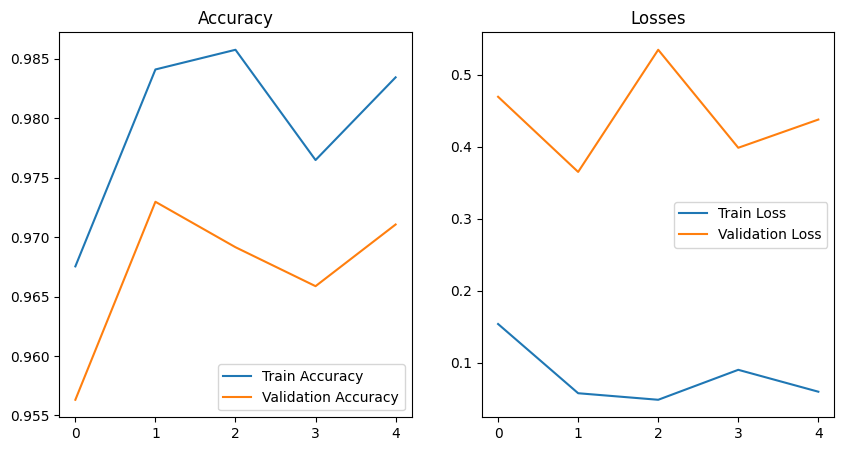

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Left plots
ax[0].plot(train_accs, label='Train Accuracy')
ax[0].plot(val_accs, label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()


ax[1].plot(train_losses, label='Train Loss')
ax[1].plot(val_losses, label='Validation Loss')
ax[1].set_title('Losses')
ax[1].legend()
plt.show()

In [83]:
# lets PREDICT NOWWWWWWWWW!!

with torch.no_grad() :
    model.eval()
    t0 = datetime.now()
    test_loss = []
    val_loss = []
    n_correct = 0
    n_total = 0

    for images, labels in test_loader :
         # Move input data to GPU
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        y_pred = model(images)
        loss = criterion(y_pred, labels)

        # Train Loss
        test_loss.append(loss.item())

        # Train Accuracy
        _, prediction = torch.max(y_pred, 1)
        n_correct += (prediction==labels).sum().item()
        n_total += labels.shape[0]

    test_loss = np.mean(train_loss)
    train_acc = n_correct / n_total
    dt = datetime.now() - t0
    print(colored(f'Loss:{test_loss:.4f}\nAccuracy:{train_acc:.4f}\nDuration:{dt}', 'green', attrs=['bold']))

Loss:0.0597
Accuracy:0.9052
Duration:0:00:06.000244


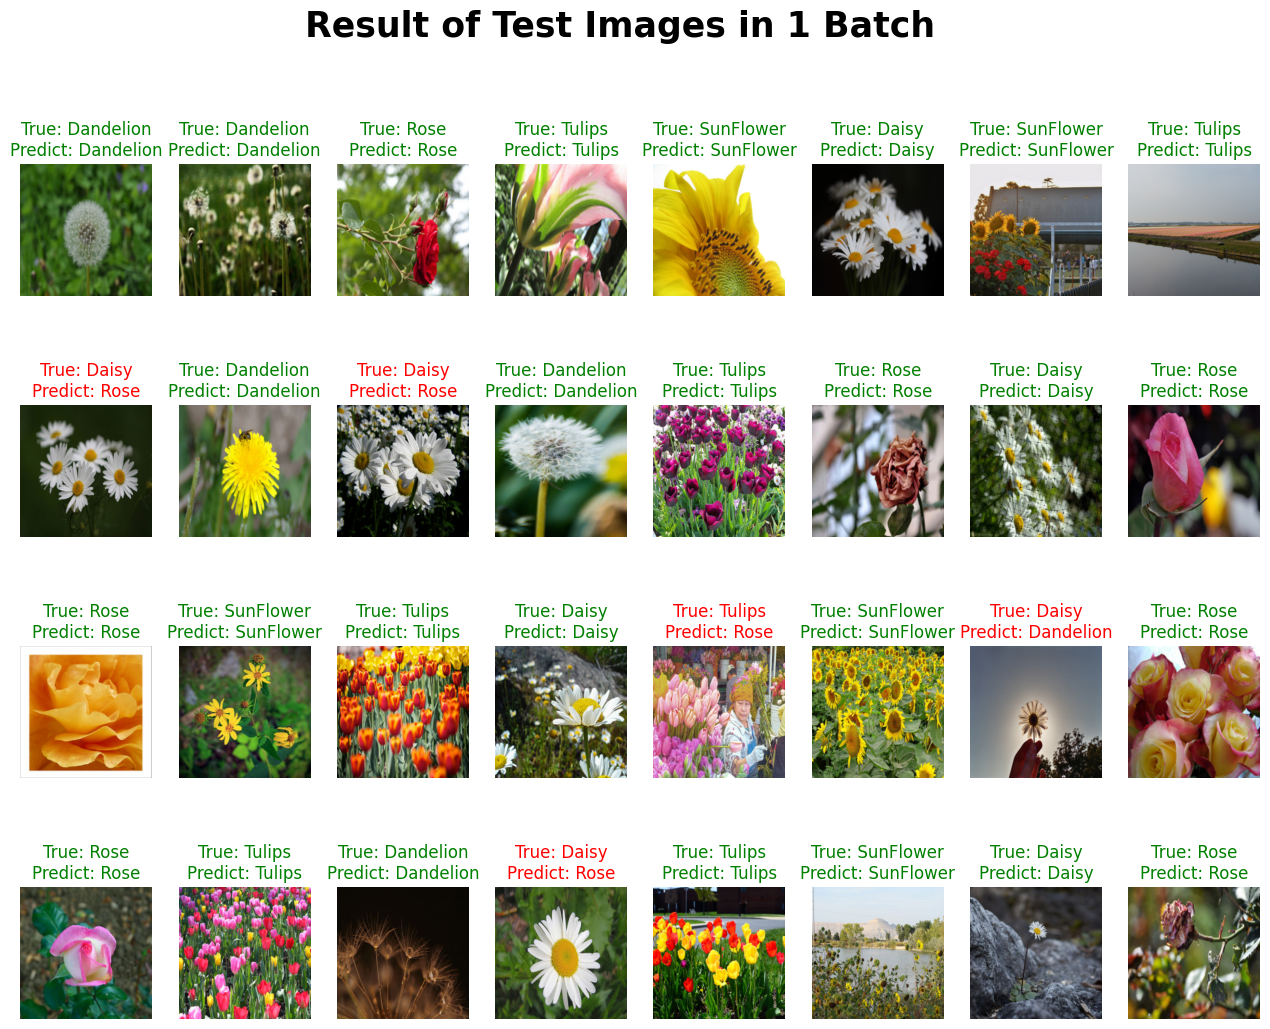

In [85]:
cpu_model = model.cpu()
# Get 1 batch of test_loader
for imgs, labels in test_loader:
    break

# Plot 1 batch of test_loader images with True and Predicted label
plt.subplots(4, 8, figsize=(16, 12))
plt.suptitle('Result of Test Images in 1 Batch', fontsize=25, fontweight='bold')

for i in range(32):  # Assuming the batch size is 32
    ax = plt.subplot(4, 8, i + 1)
    img = torch.permute(imgs[i], (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    plt.imshow(img)

    label = label_map[int(labels[i])]
    img = imgs[i].unsqueeze(0)  # Add batch dimension
    out = cpu_model(img)  # Get the model's output
    predict = label_map[int(out.argmax())]  # Get the predicted label

    # Set title color based on match
    if predict == label:
        title_color = 'green'
    else:
        title_color = 'red'

    plt.title(f'True: {label}\nPredict: {predict}', color=title_color)
    plt.axis('off')

plt.show()


In [ ]:
# credit : https://www.kaggle.com/code/nimapourmoradi/flowers-by-pytorch/notebook